In [1]:
import pandas as pd
import numpy as np 
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, log_loss
from matplotlib import pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense 

## Importo il DataSet

In [25]:
data = pd.read_csv(r'C:\Users\claud\Desktop\Python\MASTER CLASS MACHINE LEARNING\moduli\data\titanic.csv')
data.head(5)

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833
2,1,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,53.1000
4,0,3,Mr. William Henry Allen,male,35.0,0,0,8.0500


### Verifichiamo se sono presenti valori nulli

In [3]:
data.isnull().values.any()

False

### Trasformo il dataSet in un array

In [4]:
data = data.values

In [5]:
x = data[:,1:]
y = data[:, 0]

In [6]:
print(x[42])
print('')
print(y[42])

[2 'Miss. Simonne Marie Anne Andree Laroche' 'female' 3.0 1 2 41.5792]

1


### Per compatibilta' del formato che si aspetta keras essendo il nostro un vettore di etichette ma noi serve un vettore di vettori 

In [7]:
y = np.reshape(y,(len(y), 1))

print(y[42])

[1]


###  Trasformo i dati sul sesso dei passeggeri in numeri dove 1 sara maschio e 0 femmina

In [8]:
print(x[42],[2])

label_encoder_sex = LabelEncoder()
x[:,2] = label_encoder_sex.fit_transform(x[:,2])

print(x[42][2])


[2 'Miss. Simonne Marie Anne Andree Laroche' 'female' 3.0 1 2 41.5792] [2]
0


### Estraggo dalla colonna nome dei passeggeri il quale estrarremo solo le informazioni che riguardano il loro stato civile per vedere se sono presenti delle correlazioni con il fatto che si siano salvati o meno 



In [9]:
stato_civile_valido = ['Miss.', 'Master.', 'Mr.', 'Mrs.']

a= []

for i in x[:, 1]:
    found_match = False
    for s in stato_civile_valido:
        if s in i:
            a.append(s)
            found_match = True
            break
    if not found_match:
        a.append('NaN')

In [10]:
a = np.array(a)
print(a)
a = a.reshape((887, ))

['Mr.' 'Mrs.' 'Miss.' 'Mrs.' 'Mr.' 'Mr.' 'Mr.' 'Master.' 'Mrs.' 'Mrs.'
 'Miss.' 'Miss.' 'Mr.' 'Mr.' 'Miss.' 'Mrs.' 'Master.' 'Mr.' 'Mrs.' 'Mrs.'
 'Mr.' 'Mr.' 'Miss.' 'Mr.' 'Miss.' 'Mrs.' 'Mr.' 'Mr.' 'Miss.' 'Mr.' 'NaN'
 'Mrs.' 'Miss.' 'Mr.' 'Mr.' 'Mr.' 'Mr.' 'Mr.' 'Miss.' 'Miss.' 'Mrs.'
 'Mrs.' 'Miss.' 'Miss.' 'Mr.' 'Mr.' 'Miss.' 'Mr.' 'Mrs.' 'Master.' 'Mr.'
 'Mrs.' 'Mrs.' 'Mr.' 'Mr.' 'Miss.' 'Mr.' 'Miss.' 'Master.' 'Mr.' 'Miss.'
 'Mr.' 'Master.' 'Mr.' 'Master.' 'Mrs.' 'Mr.' 'Miss.' 'Mr.' 'Mr.' 'Miss.'
 'Mr.' 'Mr.' 'Mr.' 'Mr.' 'Mr.' 'Mr.' 'Master.' 'Miss.' 'Mr.' 'Mr.' 'Miss.'
 'Mr.' 'Miss.' 'Mrs.' 'Mr.' 'Mr.' 'Miss.' 'Mr.' 'Mr.' 'Mr.' 'Mr.' 'Mr.'
 'Mr.' 'Mr.' 'Mr.' 'Mr.' 'Mrs.' 'Mr.' 'Miss.' 'Mr.' 'Mr.' 'Mr.' 'Mr.'
 'Mr.' 'Miss.' 'Mr.' 'Mr.' 'Miss.' 'Mr.' 'Miss.' 'Mr.' 'Miss.' 'Miss.'
 'Mr.' 'Mr.' 'Mr.' 'Mr.' 'Miss.' 'Mr.' 'Mr.' 'Mr.' 'Miss.' 'Mr.' 'Master.'
 'Mr.' 'Mr.' 'Miss.' 'Mr.' 'Mr.' 'Mr.' 'Mrs.' 'Mrs.' 'Mr.' 'Mr.' 'Miss.'
 'Mr.' 'Mr.' 'Mr.' 'Mrs.' 'Miss.' 'Mrs.' 'Mr.' 'Mr.' 'Mr

In [11]:
print(a.shape)

(887,)


In [12]:
x[:, 1] = a
print(x[5,1])

Mr.


### Eliminiamo le righe che hanno il file mancante (NaN) 

In [13]:
x = pd.DataFrame(x)

# Rimozione delle righe contenenti NaN
x = x.dropna()

# Convertire il DataFrame risultante in un array
x = x.values



### Trasformiamo gli stati civili dei passeggeri in numeri 

In [14]:
label_encoder_Name = LabelEncoder()
x[:,1] = label_encoder_Name.fit_transform(x[:,1])

print(x[5,1])

2


### Presentazione dell array 

In [16]:
print(x[15:19])

[[2 3 0 55.0 0 0 16.0]
 [3 0 1 2.0 4 1 29.125]
 [2 2 1 23.0 0 0 13.0]
 [3 3 0 31.0 1 0 18.0]]


### Creiamo un dataset di test e uno di train 

In [17]:
x = np.array(x, dtype='float32')
y = np.array(y, dtype='float32')

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.2)

In [18]:
print(x_train.shape)
print(y_train.shape)
print('---')
print(x_test.shape)
print(y_test.shape)

(709, 7)
(709, 1)
---
(178, 7)
(178, 1)


### Normalizzazione dei dati in modo tale che il prezzo dei biglietti non influisca con le altre features 

In [19]:
sc = MinMaxScaler()
sc.fit(x_train)

x_train_norm = sc.transform(x_train)
x_test_norm = sc.transform(x_test)

### Creazione modello di RNN

In [20]:
classifier = Sequential()
classifier.add(Dense(units=10, activation ='relu', input_dim= x.shape[1]))
classifier.add(Dense(units=8, activation ='relu'))
classifier.add(Dense(units=6, activation ='relu'))
classifier.add(Dense(units=1, use_bias=False, activation= 'sigmoid'))
classifier.compile(optimizer='adam', loss= 'binary_crossentropy', metrics= ['accuracy'])
classifier.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                80        
                                                                 
 dense_1 (Dense)             (None, 8)                 88        
                                                                 
 dense_2 (Dense)             (None, 6)                 54        
                                                                 
 dense_3 (Dense)             (None, 1)                 6         
                                                                 
Total params: 228 (912.00 Byte)
Trainable params: 228 (912.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


### Addestramento modello

In [21]:
training_history = classifier.fit(
    x_train_norm,
    y_train,
    validation_data=(x_test_norm, y_test),
    batch_size = 150,
    epochs = 250,
    verbose = 0
)

### Grafici con Loss , Val_Loss, Acc e Vall_acc

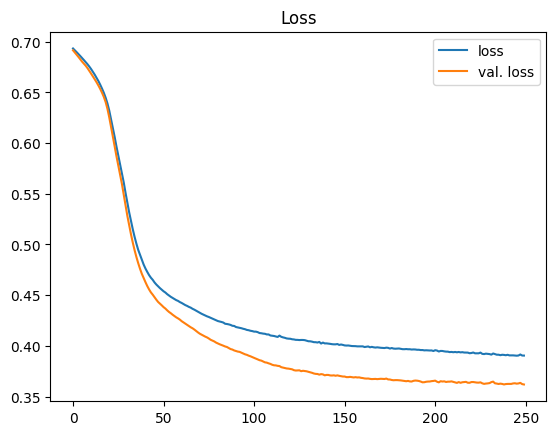

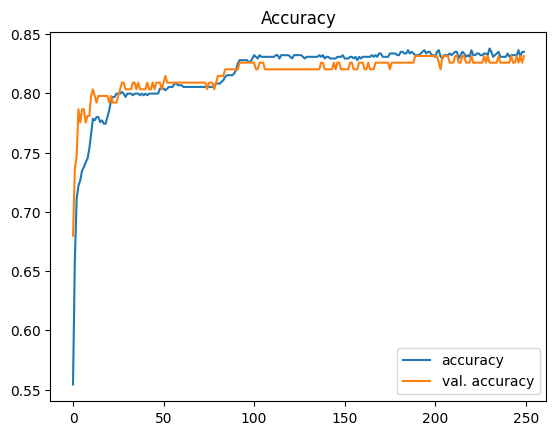

In [22]:
plt.title('Loss')
plt.plot(training_history.history['loss'], label='loss')
plt.plot(training_history.history['val_loss'], label='val. loss')
plt.legend()

plt.show()

# accuratezza
plt.title('Accuracy')
plt.plot(training_history.history['accuracy'], label='accuracy')
plt.plot(training_history.history['val_accuracy'], label='val. accuracy')
plt.legend()

plt.show()

### Predizioni con Accuratezza del modello 

In [23]:
predictions = classifier.predict(x_test_norm)
predictions = [0 if p < 0.5 else 1 for p in predictions]

6/6 [==============================] - 0s 1ms/step


In [24]:
print('Accuratezza modello:', accuracy_score(y_test, predictions) * 100, '%')

Accuratezza modello: 83.14606741573034 %
